# The network traffic and patients bio-metric data

 The network traffic and patients bio-metric data combined dataset is generated using
the ARGUS tool The biometric data includes the temperature, peripheral oxygen
saturation, pulse rate, systolic blood pressure, diastolic blood pressure, heart rate, respiration rate, and ECG ST segment data. The network traffic flow records and their metrics
are captured to obtain the overall network traffic features. Overall, the dataset contains
44 features, including 35 network traffic features out of 44 features. The dataset output
is labeled as an attack or normal traffic. The attack traffic is labeled as “0”, whereas the
normal traffic is labeled as “1”. 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [32]:
data = pd.read_csv("wustl-ehms-2020.csv")

In [33]:
data.head()

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,SrcJitter,DstJitter,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Dur,Trans,TotPkts,TotBytes,Load,Loss,pLoss,pSrcLoss,pDstLoss,Rate,SrcMac,DstMac,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496.0,186.0,276914.0,92305.0,0.0,0.0,3.582333,1.9015,0.0,0.0,2.946239,1.6235,310,66,60,60,0.010747,1,7.0,682.0,369219.0,0,0.0,0.0,0.0,558.295,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,1,28.9,0,0,0,0,0,0,0.0,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496.0,186.0,230984.0,76995.0,0.0,0.0,4.294667,2.9015,0.0,0.0,3.091654,2.8625,310,66,60,60,0.012884,1,7.0,682.0,307979.0,0,0.0,0.0,0.0,465.694,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,2,28.9,0,0,0,0,78,17,0.4,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496.0,186.0,218470.0,72823.0,0.0,0.0,4.540667,3.2945,0.0,0.0,2.849841,3.1655,310,66,60,60,0.013622,1,7.0,682.0,291293.0,0,0.0,0.0,0.0,440.464,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,3,28.9,89,104,0,0,78,17,0.4,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496.0,186.0,203376.0,67792.0,0.0,0.0,4.877667,3.3320,0.0,0.0,2.452252,3.2570,310,66,60,60,0.014633,1,7.0,682.0,271168.0,0,0.0,0.0,0.0,410.032,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,4,28.9,89,104,0,0,79,17,0.4,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496.0,186.0,235723.0,78574.0,0.0,0.0,4.208333,2.8635,0.0,0.0,3.021835,2.8225,310,66,60,60,0.012625,1,7.0,682.0,314297.0,0,0.0,0.0,0.0,475.247,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,5,28.9,89,101,0,0,79,17,0.4,0


In [4]:
data.shape

(16318, 44)

In [5]:
data.columns

Index(['Dir', 'Flgs', 'SrcAddr', 'DstAddr', 'Sport', 'Dport', 'SrcBytes',
       'DstBytes', 'SrcLoad', 'DstLoad', 'SrcGap', 'DstGap', 'SIntPkt',
       'DIntPkt', 'SIntPktAct', 'DIntPktAct', 'SrcJitter', 'DstJitter',
       'sMaxPktSz', 'dMaxPktSz', 'sMinPktSz', 'dMinPktSz', 'Dur', 'Trans',
       'TotPkts', 'TotBytes', 'Load', 'Loss', 'pLoss', 'pSrcLoss', 'pDstLoss',
       'Rate', 'SrcMac', 'DstMac', 'Packet_num', 'Temp', 'SpO2', 'Pulse_Rate',
       'SYS', 'DIA', 'Heart_rate', 'Resp_Rate', 'ST', 'Label'],
      dtype='object')

In [10]:
data['Label'].unique()

array([0, 1], dtype=int64)

In [14]:
 data['Label'].value_counts() 
    

0    14272
1     2046
Name: Label, dtype: int64

In [16]:
14272/(2046 + 14272)*100   # normal case

87.46169873759038

In [17]:
2046/(2046 + 14272)*100  # attack case

12.53830126240961

### Null value Check

In [18]:
data.isnull().sum()  # null value not present

Dir           0
Flgs          0
SrcAddr       0
DstAddr       0
Sport         0
Dport         0
SrcBytes      0
DstBytes      0
SrcLoad       0
DstLoad       0
SrcGap        0
DstGap        0
SIntPkt       0
DIntPkt       0
SIntPktAct    0
DIntPktAct    0
SrcJitter     0
DstJitter     0
sMaxPktSz     0
dMaxPktSz     0
sMinPktSz     0
dMinPktSz     0
Dur           0
Trans         0
TotPkts       0
TotBytes      0
Load          0
Loss          0
pLoss         0
pSrcLoss      0
pDstLoss      0
Rate          0
SrcMac        0
DstMac        0
Packet_num    0
Temp          0
SpO2          0
Pulse_Rate    0
SYS           0
DIA           0
Heart_rate    0
Resp_Rate     0
ST            0
Label         0
dtype: int64

### information about data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dir         16318 non-null  object 
 1   Flgs        16318 non-null  object 
 2   SrcAddr     16318 non-null  object 
 3   DstAddr     16318 non-null  object 
 4   Sport       16318 non-null  object 
 5   Dport       16318 non-null  int64  
 6   SrcBytes    16318 non-null  float64
 7   DstBytes    16318 non-null  float64
 8   SrcLoad     16318 non-null  float64
 9   DstLoad     16318 non-null  float64
 10  SrcGap      16318 non-null  float64
 11  DstGap      16318 non-null  float64
 12  SIntPkt     16318 non-null  float64
 13  DIntPkt     16318 non-null  float64
 14  SIntPktAct  16318 non-null  float64
 15  DIntPktAct  16318 non-null  float64
 16  SrcJitter   16318 non-null  float64
 17  DstJitter   16318 non-null  float64
 18  sMaxPktSz   16318 non-null  int64  
 19  dMaxPktSz   16318 non-nul

### data descriptions

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dport,16318.0,1111.000000,0.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03
SrcBytes,16318.0,496.650264,28.584642,310.000000,496.000000,496.000000,496.000000,2.298000e+03
DstBytes,16318.0,187.077706,18.688525,120.000000,186.000000,186.000000,186.000000,8.820000e+02
SrcLoad,16318.0,211840.633005,79429.880071,0.000000,199053.500000,236679.000000,261557.000000,1.134000e+06
DstLoad,16318.0,71024.354940,45308.106133,507.447000,66355.000000,78893.000000,87193.000000,3.938000e+06
SrcGap,16318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DstGap,16318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SIntPkt,16318.0,10.946755,101.230484,0.875000,3.792667,4.191333,4.984167,9.497338e+03
DIntPkt,16318.0,8.515423,52.504560,0.730500,2.226000,2.562250,3.136375,2.445732e+03
SIntPktAct,16318.0,1.286918,62.123452,0.000000,0.000000,0.000000,0.000000,3.002812e+03


<AxesSubplot:xlabel='SrcLoad'>

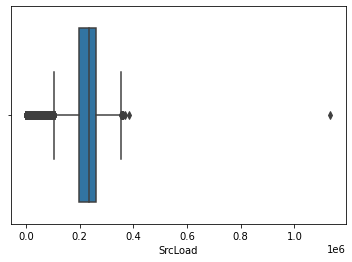

In [29]:
sns.boxplot(data['SrcLoad']) #SrcLoad

In [30]:
IQR=df.SrcLoad.quantile(0.75)-df.SrcLoad.quantile(0.25)

lower_bridge=df['SrcLoad'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['SrcLoad'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


105298.24999999996
355312.25000000006


(None, None)

<AxesSubplot:xlabel='SrcBytes'>

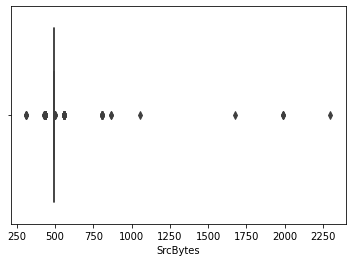

In [26]:
sns.boxplot(data['SrcBytes']) #SrcLoad

In [28]:
df = data.copy()
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.SrcBytes.quantile(0.75)-df.SrcBytes.quantile(0.25)

lower_bridge=df['SrcBytes'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['SrcBytes'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


496.0
496.0


(None, None)

In [34]:
from EDA import *

In [36]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) # function call


Observations: 16318
Variables: 44
cat_cols: 21
num_cols: 22
cat_but_car: 1
num_but_cat: 15


In [37]:
cat_but_car

['Sport']

In [39]:
cat_but_car

['Sport']

In [40]:
cat_cols

['Dir',
 'Flgs',
 'SrcAddr',
 'DstAddr',
 'SrcMac',
 'DstMac',
 'Dport',
 'SrcGap',
 'DstGap',
 'SIntPktAct',
 'DIntPktAct',
 'sMaxPktSz',
 'dMaxPktSz',
 'sMinPktSz',
 'dMinPktSz',
 'Trans',
 'Loss',
 'pLoss',
 'pSrcLoss',
 'pDstLoss',
 'Label']

In [41]:
num_cols

['SrcBytes',
 'DstBytes',
 'SrcLoad',
 'DstLoad',
 'SIntPkt',
 'DIntPkt',
 'SrcJitter',
 'DstJitter',
 'Dur',
 'TotPkts',
 'TotBytes',
 'Load',
 'Rate',
 'Packet_num',
 'Temp',
 'SpO2',
 'Pulse_Rate',
 'SYS',
 'DIA',
 'Heart_rate',
 'Resp_Rate',
 'ST']

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dir         16318 non-null  object 
 1   Flgs        16318 non-null  object 
 2   SrcAddr     16318 non-null  object 
 3   DstAddr     16318 non-null  object 
 4   Sport       16318 non-null  object 
 5   Dport       16318 non-null  int64  
 6   SrcBytes    16318 non-null  float64
 7   DstBytes    16318 non-null  float64
 8   SrcLoad     16318 non-null  float64
 9   DstLoad     16318 non-null  float64
 10  SrcGap      16318 non-null  float64
 11  DstGap      16318 non-null  float64
 12  SIntPkt     16318 non-null  float64
 13  DIntPkt     16318 non-null  float64
 14  SIntPktAct  16318 non-null  float64
 15  DIntPktAct  16318 non-null  float64
 16  SrcJitter   16318 non-null  float64
 17  DstJitter   16318 non-null  float64
 18  sMaxPktSz   16318 non-null  int64  
 19  dMaxPktSz   16318 non-nul

# OUTLIER Catching

In [46]:
from PreProcessing import outlier_thresholds

In [47]:
df.columns

Index(['Dir', 'Flgs', 'SrcAddr', 'DstAddr', 'Sport', 'Dport', 'SrcBytes', 'DstBytes', 'SrcLoad', 'DstLoad', 'SrcGap', 'DstGap', 'SIntPkt', 'DIntPkt', 'SIntPktAct', 'DIntPktAct', 'SrcJitter', 'DstJitter', 'sMaxPktSz', 'dMaxPktSz', 'sMinPktSz', 'dMinPktSz', 'Dur', 'Trans', 'TotPkts', 'TotBytes', 'Load', 'Loss', 'pLoss', 'pSrcLoss', 'pDstLoss', 'Rate', 'SrcMac', 'DstMac', 'Packet_num', 'Temp', 'SpO2', 'Pulse_Rate', 'SYS', 'DIA', 'Heart_rate', 'Resp_Rate', 'ST', 'Label'], dtype='object')

In [48]:
outlier_thresholds(df, 'SIntPkt')

(2.0054177499999986, 6.771415750000002)

# Outlier Present or not

In [49]:
from PreProcessing import check_outlier

check_outlier(df, 'SIntPkt')

True

In [50]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]
num_cols

['SrcBytes',
 'DstBytes',
 'SrcLoad',
 'DstLoad',
 'SIntPkt',
 'DIntPkt',
 'SrcJitter',
 'DstJitter',
 'Dur',
 'TotPkts',
 'TotBytes',
 'Load',
 'Rate',
 'Packet_num',
 'Temp',
 'SpO2',
 'Pulse_Rate',
 'SYS',
 'DIA',
 'Heart_rate',
 'Resp_Rate',
 'ST']

In [51]:
for col in num_cols:
    print(col, check_outlier(df, col))

SrcBytes True
DstBytes True
SrcLoad True
DstLoad True
SIntPkt True
DIntPkt True
SrcJitter True
DstJitter True
Dur True
TotPkts True
TotBytes True
Load True
Rate True
Packet_num False
Temp True
SpO2 True
Pulse_Rate True
SYS True
DIA True
Heart_rate True
Resp_Rate True
ST True


In [53]:
# from PreProcessing import grab_outliers
# grab_outliers(df,'ST')

In [54]:
from PreProcessing import remove_outlier

for col in num_cols:
    new_df = remove_outlier(df, col)

In [55]:
new_df

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,SrcJitter,DstJitter,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Dur,Trans,TotPkts,TotBytes,Load,Loss,pLoss,pSrcLoss,pDstLoss,Rate,SrcMac,DstMac,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496.0,186.0,230984.0,76995.0,0.0,0.0,4.294667,2.9015,0.0,0.0,3.091654,2.8625,310,66,60,60,0.012884,1,7.0,682.0,307979.0,0,0.0,0.0,0.0,465.694,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,2,28.9,0,0,0,0,78,17,0.4,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496.0,186.0,218470.0,72823.0,0.0,0.0,4.540667,3.2945,0.0,0.0,2.849841,3.1655,310,66,60,60,0.013622,1,7.0,682.0,291293.0,0,0.0,0.0,0.0,440.464,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,3,28.9,89,104,0,0,78,17,0.4,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496.0,186.0,203376.0,67792.0,0.0,0.0,4.877667,3.3320,0.0,0.0,2.452252,3.2570,310,66,60,60,0.014633,1,7.0,682.0,271168.0,0,0.0,0.0,0.0,410.032,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,4,28.9,89,104,0,0,79,17,0.4,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496.0,186.0,235723.0,78574.0,0.0,0.0,4.208333,2.8635,0.0,0.0,3.021835,2.8225,310,66,60,60,0.012625,1,7.0,682.0,314297.0,0,0.0,0.0,0.0,475.247,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,5,28.9,89,101,0,0,79,17,0.4,0
5,->,e,10.0.1.172,10.0.1.150,58074,1111,496.0,186.0,191284.0,63761.0,0.0,0.0,5.186000,3.8030,0.0,0.0,3.666978,3.7970,310,66,60,60,0.015558,1,7.0,682.0,255046.0,0,0.0,0.0,0.0,385.654,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,6,28.9,91,103,0,0,79,17,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,->,e,10.0.1.172,10.0.1.150,57348,1111,496.0,186.0,205128.0,68376.0,0.0,0.0,4.836000,2.7995,0.0,0.0,3.547541,2.6945,310,66,60,60,0.014508,1,7.0,682.0,273504.0,0,0.0,0.0,0.0,413.565,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,16310,27.7,98,73,148,84,73,19,0.3,0
16314,->,e,10.0.1.172,10.0.1.150,63265,1111,496.0,186.0,274058.0,91353.0,0.0,0.0,3.619667,1.9535,0.0,0.0,2.897987,1.8935,310,66,60,60,0.010859,1,7.0,682.0,365411.0,0,0.0,0.0,0.0,552.537,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,16311,27.7,98,73,148,84,73,19,0.3,0
16315,->,e,10.0.1.172,10.0.1.150,63918,1111,496.0,186.0,288568.0,96189.0,0.0,0.0,3.437667,2.2180,0.0,0.0,2.513893,2.1150,310,66,60,60,0.010313,1,7.0,682.0,384757.0,0,0.0,0.0,0.0,581.790,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,16312,23.6,98,73,148,84,73,19,0.3,0
16316,->,e,10.0.1.172,10.0.1.150,52345,1111,496.0,186.0,237795.0,79265.0,0.0,0.0,4.171667,2.3420,0.0,0.0,3.067978,2.2360,310,66,60,60,0.012515,1,7.0,682.0,317060.0,0,0.0,0.0,0.0,479.425,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,16313,27.4,98,73,148,84,73,19,0.3,0


In [58]:
df.shape[0] - new_df.shape[0]

698

<AxesSubplot:xlabel='SrcBytes', ylabel='Density'>

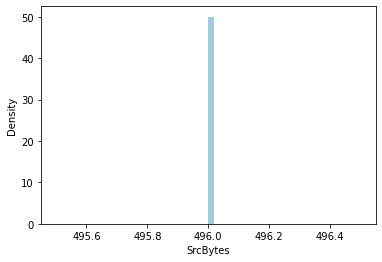

In [69]:
sns.distplot(df['SrcBytes']) 

<AxesSubplot:xlabel='SrcBytes'>

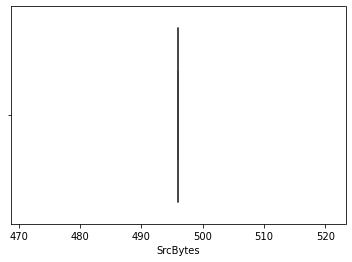

In [67]:
sns.boxplot(df['SrcBytes']) 

<AxesSubplot:xlabel='SrcBytes'>

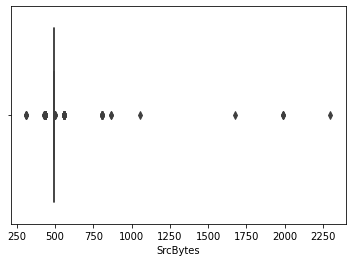

In [68]:
sns.boxplot(data['SrcBytes']) 

In [62]:
from PreProcessing import replace_with_thresholds

for col in num_cols:
    print(col, check_outlier(df, col))

SrcBytes True
DstBytes True
SrcLoad True
DstLoad True
SIntPkt True
DIntPkt True
SrcJitter True
DstJitter True
Dur True
TotPkts True
TotBytes True
Load True
Rate True
Packet_num False
Temp True
SpO2 True
Pulse_Rate True
SYS True
DIA True
Heart_rate True
Resp_Rate True
ST True


In [63]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [64]:
for col in num_cols:
    print(col, check_outlier(df, col))

SrcBytes False
DstBytes False
SrcLoad False
DstLoad False
SIntPkt False
DIntPkt False
SrcJitter False
DstJitter False
Dur False
TotPkts False
TotBytes False
Load False
Rate False
Packet_num False
Temp False
SpO2 False
Pulse_Rate False
SYS False
DIA False
Heart_rate False
Resp_Rate False
ST False


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dport,16318.0,1111.000000,0.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
SrcBytes,16318.0,496.000000,0.000000,496.000000,496.000000,496.000000,496.000000,496.000000
DstBytes,16318.0,186.000000,0.000000,186.000000,186.000000,186.000000,186.000000,186.000000
SrcLoad,16318.0,221030.438779,59214.861732,105298.250000,199053.500000,236679.000000,261557.000000,355312.250000
DstLoad,16318.0,73685.131634,19741.409282,35098.000000,66355.000000,78893.000000,87193.000000,118450.000000
SrcGap,16318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DstGap,16318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SIntPkt,16318.0,4.597652,1.135088,2.005418,3.792667,4.191333,4.984167,6.771416
DIntPkt,16318.0,2.803665,0.808835,0.860437,2.226000,2.562250,3.136375,4.501938
SIntPktAct,16318.0,1.286918,62.123452,0.000000,0.000000,0.000000,0.000000,3002.812000


<AxesSubplot:xlabel='SIntPkt', ylabel='Density'>

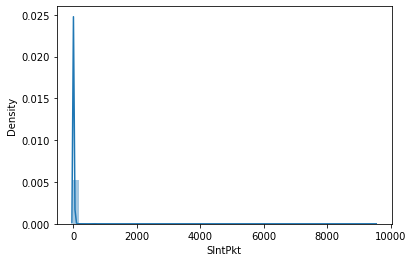

In [71]:
sns.distplot(data['SIntPkt'])

<AxesSubplot:xlabel='SIntPkt', ylabel='Density'>

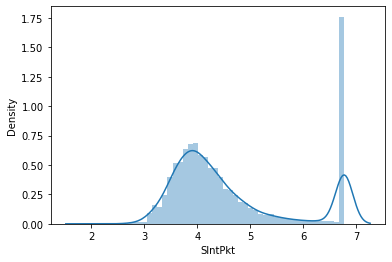

In [72]:
sns.distplot(df['SIntPkt'])

<AxesSubplot:xlabel='Rate', ylabel='Density'>

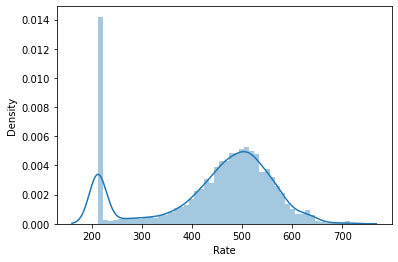

In [73]:
 sns.distplot(df['Rate']) #Rate

<AxesSubplot:xlabel='Rate', ylabel='Density'>

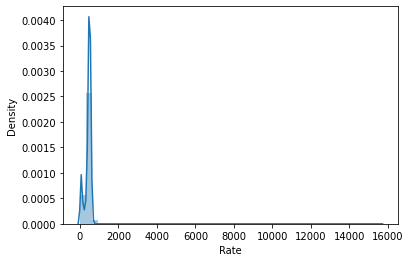

In [74]:
sns.distplot(data['Rate'])

In [75]:
df.shape # outlier not present

(16318, 44)

In [76]:
data.shape

(16318, 44)

In [77]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) # function call

Observations: 16318
Variables: 44
cat_cols: 26
num_cols: 17
cat_but_car: 1
num_but_cat: 20


### categorical varibale

In [78]:
cat_cols

['Dir',
 'Flgs',
 'SrcAddr',
 'DstAddr',
 'SrcMac',
 'DstMac',
 'Dport',
 'SrcBytes',
 'DstBytes',
 'SrcGap',
 'DstGap',
 'SIntPktAct',
 'DIntPktAct',
 'sMaxPktSz',
 'dMaxPktSz',
 'sMinPktSz',
 'dMinPktSz',
 'Trans',
 'TotPkts',
 'TotBytes',
 'Loss',
 'pLoss',
 'pSrcLoss',
 'pDstLoss',
 'SpO2',
 'Label']

In [80]:
df['Dir'].value_counts()

   ->    16318
Name: Dir, dtype: int64

In [82]:
df['Flgs'].value_counts()

 e            15237
 M              924
 eR             138
 e s              8
 M *              7
 M d              3
 MR               1
Name: Flgs, dtype: int64

In [83]:
df['Trans'].value_counts()

1    16318
Name: Trans, dtype: int64

In [81]:
df.head()

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,SrcJitter,DstJitter,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Dur,Trans,TotPkts,TotBytes,Load,Loss,pLoss,pSrcLoss,pDstLoss,Rate,SrcMac,DstMac,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496.0,186.0,276914.0,92305.0,0.0,0.0,3.582333,1.9015,0.0,0.0,2.946239,1.6235,310,66,60,60,0.010747,1,7.0,682.0,369219.0,0,0.0,0.0,0.0,558.295,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,1,28.9,98,64,133,64,64,9,0.05,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496.0,186.0,230984.0,76995.0,0.0,0.0,4.294667,2.9015,0.0,0.0,3.091654,2.8625,310,66,60,60,0.012884,1,7.0,682.0,307979.0,0,0.0,0.0,0.0,465.694,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,2,28.9,98,64,133,64,78,17,0.40,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496.0,186.0,218470.0,72823.0,0.0,0.0,4.540667,3.2945,0.0,0.0,2.849841,3.1655,310,66,60,60,0.013622,1,7.0,682.0,291293.0,0,0.0,0.0,0.0,440.464,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,3,28.9,98,88,133,64,78,17,0.40,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496.0,186.0,203376.0,67792.0,0.0,0.0,4.877667,3.3320,0.0,0.0,2.452252,3.2570,310,66,60,60,0.014633,1,7.0,682.0,271168.0,0,0.0,0.0,0.0,410.032,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,4,28.9,98,88,133,64,79,17,0.40,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496.0,186.0,235723.0,78574.0,0.0,0.0,4.208333,2.8635,0.0,0.0,3.021835,2.8225,310,66,60,60,0.012625,1,7.0,682.0,314297.0,0,0.0,0.0,0.0,475.247,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,5,28.9,98,88,133,64,79,17,0.40,0
